<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Sprint Challenge
## *Data Science Unit 4 Sprint 1*

After a week of Natural Language Processing, you've learned some cool new stuff: how to process text, how turn text into vectors, and how to model topics from documents. Apply your newly acquired skills to one of the most famous NLP datasets out there: [Yelp](https://www.yelp.com/dataset/challenge). As part of the job selection process, some of my friends have been asked to create analysis of this dataset, so I want to empower you to have a head start.  

The real dataset is massive (almost 8 gigs uncompressed). I've sampled the data for you to something more managable for the Sprint Challenge. You can analyze the full dataset as a stretch goal or after the sprint challenge. As you work on the challenge, I suggest adding notes about your findings and things you want to analyze in the future.

## Challenge Objectives
*Successfully complete these all these objectives to earn a 2. There are more details on each objective further down in the notebook.*
* <a href="#p1">Part 1</a>: Write a function to tokenize the yelp reviews
* <a href="#p2">Part 2</a>: Create a vector representation of those tokens
* <a href="#p3">Part 3</a>: Use your tokens in a classification model on yelp rating
* <a href="#p4">Part 4</a>: Estimate & Interpret a topic model of the Yelp reviews

In [92]:
import pandas as pd

yelp = pd.read_json('./data/review_sample.json', lines=True)

In [93]:
yelp.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,nDuEqIyRc8YKS1q1fX0CZg,1,2015-03-31 16:50:30,0,eZs2tpEJtXPwawvHnHZIgQ,1,"BEWARE!!! FAKE, FAKE, FAKE....We also own a sm...",10,n1LM36qNg4rqGXIcvVXv8w
1,eMYeEapscbKNqUDCx705hg,0,2015-12-16 05:31:03,0,DoQDWJsNbU0KL1O29l_Xug,4,Came here for lunch Togo. Service was quick. S...,0,5CgjjDAic2-FAvCtiHpytA
2,6Q7-wkCPc1KF75jZLOTcMw,1,2010-06-20 19:14:48,1,DDOdGU7zh56yQHmUnL1idQ,3,I've been to Vegas dozens of times and had nev...,2,BdV-cf3LScmb8kZ7iiBcMA
3,k3zrItO4l9hwfLRwHBDc9w,3,2010-07-13 00:33:45,4,LfTMUWnfGFMOfOIyJcwLVA,1,We went here on a night where they closed off ...,5,cZZnBqh4gAEy4CdNvJailQ
4,6hpfRwGlOzbNv7k5eP9rsQ,1,2018-06-30 02:30:01,0,zJSUdI7bJ8PNJAg4lnl_Gg,4,"3.5 to 4 stars\n\nNot bad for the price, $12.9...",5,n9QO4ClYAS7h9fpQwa5bhA


## Part 1: Tokenize Function
<a id="#p1"></a>

Complete the function `tokenize`. Your function should
- accept one document at a time
- return a list of tokens

You are free to use any method you have learned this week.

In [94]:
import spacy
nlp = spacy.load("en_core_web_lg")

In [10]:
#my attempt at generator function for streaming version of generating the lemmas:
'''def doc_stream_lemmas(doc_series):
    for d in doc_series:
        lemmas = []
        doc = nlp(d)
        for token in doc: 
            if ((token.is_stop == False) and (token.is_punct == False)) and (token.pos_!= 'PRON'):
                lemmas.append(token.lemma_)
        yield lemmas'''

In [95]:
def get_lemmas(text):
    lemmas = []
    doc = nlp(text)
    for token in doc: 
        if ((token.is_stop == False) and (token.is_punct == False)) and (token.pos_!= 'PRON'):
            #filtering out a few extra stop_words:
            if token.text != '\n' and token.text != '\n\n' and token.text != '$' and token.text != ' ':
                lemmas.append(token.lemma_)
    return lemmas

In [96]:
yelp['lemmas']= yelp['text'].apply(get_lemmas)

In [97]:
yelp.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id,lemmas
0,nDuEqIyRc8YKS1q1fX0CZg,1,2015-03-31 16:50:30,0,eZs2tpEJtXPwawvHnHZIgQ,1,"BEWARE!!! FAKE, FAKE, FAKE....We also own a sm...",10,n1LM36qNg4rqGXIcvVXv8w,"[beware, fake, fake, fake, small, business, Lo..."
1,eMYeEapscbKNqUDCx705hg,0,2015-12-16 05:31:03,0,DoQDWJsNbU0KL1O29l_Xug,4,Came here for lunch Togo. Service was quick. S...,0,5CgjjDAic2-FAvCtiHpytA,"[come, lunch, Togo, service, quick, staff, fri..."
2,6Q7-wkCPc1KF75jZLOTcMw,1,2010-06-20 19:14:48,1,DDOdGU7zh56yQHmUnL1idQ,3,I've been to Vegas dozens of times and had nev...,2,BdV-cf3LScmb8kZ7iiBcMA,"[Vegas, dozen, time, step, foot, Circus, Circu..."
3,k3zrItO4l9hwfLRwHBDc9w,3,2010-07-13 00:33:45,4,LfTMUWnfGFMOfOIyJcwLVA,1,We went here on a night where they closed off ...,5,cZZnBqh4gAEy4CdNvJailQ,"[go, night, close, street, party, good, actual..."
4,6hpfRwGlOzbNv7k5eP9rsQ,1,2018-06-30 02:30:01,0,zJSUdI7bJ8PNJAg4lnl_Gg,4,"3.5 to 4 stars\n\nNot bad for the price, $12.9...",5,n9QO4ClYAS7h9fpQwa5bhA,"[3.5, 4, star, bad, price, 12.99, lunch, senio..."


## Part 2: Vector Representation
<a id="#p2"></a>
1. Create a vector representation of the reviews
2. Write a fake review and query for the 10 most similiar reviews, print the text of the reviews. Do you notice any patterns?
    - Given the size of the dataset, it will probably be best to use a `NearestNeighbors` model for this. 

In [98]:
from sklearn.feature_extraction.text import TfidfVectorizer
data = []
#convert each row list of lemmas into strings, then append to one big list:
for lemma in list(yelp['lemmas']):
    data.append(' '.join(lemma))

In [99]:
#Vectorize:
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
feat_matrix = tfidf.fit_transform(data)
dense_feat_matrix = feat_matrix.todense()
features = tfidf.get_feature_names()

# View Feature Matrix as DataFrame
tfidf_df = pd.DataFrame(dense_feat_matrix, columns=features)
tfidf_df.head()

,00,000,00am,00pm,07,10,100,1000,101,11,...,yup,zen,zero,zip,zombie,zone,zoo,zucchini,était,été
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [100]:
# Instantiate
from sklearn.neighbors import NearestNeighbors

nn = NearestNeighbors(n_neighbors=5, algorithm='ball_tree')

# Fit on TF-IDF Vectors
nn.fit(dense_feat_matrix)

fake_review = ['''This place was awful, I am never coming back. The service was ridiculously slow, it took 15 minutes 
               before a waiter even greeted us and took our drink order. When we finally got our food, not only were my fries cold, 
               but I asked for extra pickles on my hamburger and they brought me a hamburger with zero pickles.
               I went into the restroom as we were leaving, and I saw a rat crawling around in the kitchen. To top it all
               the restroom smelled like a dozen homeless people had been living there for weeks. 0 STARS!!!''']

fake_review_transformed = tfidf.transform(fake_review).todense()

# Query Using kneighbors:
nn.kneighbors(fake_review_transformed)

(array([[1.        , 1.        , 1.17628727, 1.23017853, 1.24064849]]),
 array([[6204, 6311, 5892, 5084, 3770]]))

In [101]:
#inspect for similarity:
data[6204]

'旅行でラスベガスに来ましたがネイルがはげてるのが気になり、探したお店でした 質問にも丁寧に答えてくれましたし、日本人の方も日本語が話せる方も居て、とても綺麗で居心地のいいお店でした ネイルはちはるさんと言う綺麗な方が丁寧にしてくれとても気に入りました 予定になかったまつ毛エクステもお願いし、日本ではまだあまりないブラウンカラーのエクステをしてもらい、とても気に入りました また是非マッサージなどで伺いたいと思います'

In [102]:
data[6311]

'天氣很熱吃不下東西，今天我點了一個韓國冷面湯、餐後點了甜點，冰沙系列不會太甜膩，覺得店家很用心製作，包含擺盤精緻、佐料衛生，夏日想開胃，這是一個不錯的選擇，服務人員也很敬業，以後會常常來'

In [103]:
data[5892]

'hamburger delicious fry large selection drink food friendly service'

In [104]:
data[5084]

'Gordon Ramsey synonymous delicious Gourmet Burgr restaurant star rating come set standard reach hamburger longer hamburger forever know Burgr'

In [105]:
data[3770]

'HAIL GIANT HAMBURGER Friendliest staff town good burger State'

## Part 3: Classification
<a id="#p3"></a>
Your goal in this section will be to predict `stars` from the review dataset. 

1. Create a piepline object with a sklearn `CountVectorizer` or `TfidfVector` and any sklearn classifier. Use that pipeline to estimate a model to predict `stars`. Use the Pipeline to predict a star rating for your fake review from Part 2. 
2. Tune the entire pipeline with a GridSearch

In [106]:
#sklearn pipeline
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier

vect = TfidfVectorizer(stop_words='english', max_features=5000)
sgdc = SGDClassifier()
pipe = Pipeline([('vect', vect), ('classifier', sgdc)])

target = 'stars'
X_train = data #list of lemmas converted to string for each row (review) from part 2
y_train = yelp[target]
X_test = fake_review #from part 2

#Fit pipeline:
pipe.fit(X_train, y_train)
fake_review_predicted_rating = pipe.predict(X_test)
print(fake_review_predicted_rating)

[1]


In [ ]:
#GridSearch:
from sklearn.model_selection import GridSearchCV

parameters = {
    'vect__max_df': (0.5, 0.75, 1.0),
    'classifier__max_iter': (20, 10, 100)
}

grid_search = GridSearchCV(pipe, parameters, cv=5, verbose=3)
grid_search.fit(X_train, y_train)

In [108]:
results = pd.DataFrame(grid_search.cv_results_).sort_values('rank_test_score')
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__max_iter,param_vect__max_df,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
3,1.072266,0.049051,0.212136,0.013884,10,0.5,"{'classifier__max_iter': 10, 'vect__max_df': 0.5}",0.596903,0.617191,0.6000,0.600300,0.608108,0.6045,0.007346,1
7,1.204253,0.038773,0.211426,0.012252,100,0.75,"{'classifier__max_iter': 100, 'vect__max_df': ...",0.598402,0.619690,0.5970,0.599300,0.601602,0.6032,0.008382,2
2,1.174062,0.034843,0.214316,0.011394,20,1,"{'classifier__max_iter': 20, 'vect__max_df': 1.0}",0.598402,0.616192,0.5950,0.599800,0.606106,0.6031,0.007471,3
0,1.618434,0.334420,0.255044,0.060031,20,0.5,"{'classifier__max_iter': 20, 'vect__max_df': 0.5}",0.601898,0.615692,0.5985,0.597299,0.601602,0.6030,0.006589,4
8,1.172254,0.032428,0.205832,0.008210,100,1,"{'classifier__max_iter': 100, 'vect__max_df': ...",0.598402,0.620690,0.5985,0.593797,0.603103,0.6029,0.009371,5


In [109]:
best = grid_search.best_estimator_
fake_review_grid_predicted_rating = best.predict(X_test)
print(fake_review_grid_predicted_rating)

[1]


## Part 4: Topic Modeling

Let's find out what those yelp reviews are saying! :D

1. Estimate a LDA topic model of the review text
2. Create 1-2 visualizations of the results
    - You can use the most important 3 words of a topic in relevant visualizations. Refer to yesterday's notebook to extract. 
3. In markdown, write 1-2 paragraphs of analysis on the results of your topic model

__*Note*__: You can pass the DataFrame column of text reviews to gensim. You do not have to use a generator.

In [110]:
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from gensim import corpora
from gensim.models.ldamulticore import LdaMulticore
from matplotlib import pyplot as plt
from gensim.models.coherencemodel import CoherenceModel

def compute_coherence_values(tokens, id2word, corpus, limit, start=2, step=3):
    coherence_values = {}
    for num_topics in range(start, limit, step):
        model = LdaMulticore(corpus=corpus, num_topics=num_topics, id2word=id2word, workers=4)
        coherencemodel = CoherenceModel(model=model, texts=tokens, dictionary=id2word, coherence='c_v')
        coherence_values[num_topics] = coherencemodel.get_coherence()
    return coherence_values

tokens = yelp['lemmas']

#make the gensim dict:
id2word = corpora.Dictionary(tokens)

#make the corpus:
corpus = [id2word.doc2bow(text) for text in tokens]

#Call the function to calc the coherence values:
c_values = compute_coherence_values(tokens, id2word, corpus, limit=35, start=2, step=3)

cv_series = pd.Series(c_values)
cv_series.sort_values(ascending=False)

26    0.361679
20    0.356189
14    0.354549
17    0.352944
32    0.351915
8     0.351663
23    0.350737
29    0.350445
2     0.350395
11    0.350331
5     0.349799
dtype: float64

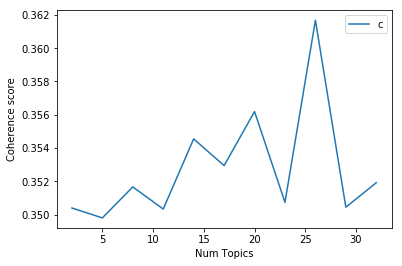

In [113]:
# Show graph
limit=41; start=4; step=3;

x = cv_series.index
y = cv_series.values

plt.plot(x, y)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [111]:
#Fit Gensim model w/appropriate # of topics- using the max coherence value, 26 topics: 
import re

lda = LdaMulticore(corpus=corpus, id2word=id2word, random_state=42, num_topics=26, passes=5, workers=3)

words = [re.findall(r'"([^"]*)"',t[1]) for t in lda.print_topics()]
topics = [' '.join(t) for t in words]
topics

['place food order come good restaurant like bar great time',
 'hair good get know service work come time want go',
 'time go coffee ask get come like definitely tell look',
 'great service food recommend need ring place amazing come coffee',
 'de et à la le les un pas est une',
 'like good look come food go time taste try experience',
 'good food great place try service like delicious love time',
 'great place time love go like good staff store food',
 'good time food come taco restaurant order great place service',
 'order food good place come chicken time like service dish',
 'cream ice good nice go like try place great chocolate',
 'service great time good food like go day say want',
 'time good food like great come want drink place wait',
 'ramen good experience like noodle meal come fry time review',
 'time service come get room wait place go ask tell',
 'good order food come service place nice time store go',
 'good place come food time go like great order service',
 'time place

In [112]:
lda.num_topics

26

In [114]:
#Visualize 
import pyLDAvis.gensim

pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(lda, corpus, id2word)

/home/jm/.local/lib/python3.6/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5      0.127066  0.092845       1        1  19.036175
6      0.015934 -0.105119       2        1  12.218997
11     0.080621  0.044489       3        1   6.426736
7      0.102756  0.058803       4        1   6.298221
24     0.064414  0.013007       5        1   5.945135
15     0.009007 -0.073298       6        1   5.272160
3      0.054256  0.020536       7        1   4.871169
10    -0.001809 -0.081177       8        1   4.828022
13    -0.016388 -0.083867       9        1   3.195375
22     0.007817 -0.010772      10        1   3.148138
18    -0.024041 -0.084486      11        1   3.039126
4      0.017583  0.037709      12        1   2.641790
12    -0.034344 -0.080721      13        1   2.603178
14     0.034662  0.023149      14        1   2.474476
0      0.009246 -0.021460      15        1   2.173681
2     -0.025428 -0.056423      16        1   2.120135
23     0.019474  0.005322      17        1   2.051433
9      0.001157 -0.024247      18        1   2.002092
17    -0.029872 -0.017757      19        1   1.999725
1      0.004294  0.003183      20        1   1.730366
21    -0.007252 -0.010340      21        1   1.387192
8      0.025917  0.080767      22        1   1.267705
19    -0.017663  0.096006      23        1   0.978177
16    -0.100764  0.021469      24        1   0.857948
25    -0.062680  0.051151      25        1   0.750038
20    -0.253962  0.101229      26        1   0.682809, topic_info=      Category         Freq        Term        Total  loglift  logprob
term                                                                  
44     Default  6345.000000        good  6345.000000  30.0000  30.0000
143    Default  4961.000000        food  4961.000000  29.0000  29.0000
22     Default  3678.000000        like  3678.000000  28.0000  28.0000
205    Default  4307.000000       great  4307.000000  27.0000  27.0000
37     Default  4189.000000        time  4189.000000  26.0000  26.0000
128    Default  5284.000000       place  5284.000000  25.0000  25.0000
370    Default  3513.000000       order  3513.000000  24.0000  24.0000
49     Default  3557.000000     service  3557.000000  23.0000  23.0000
41     Default  3813.000000        come  3813.000000  22.0000  22.0000
104    Default  1151.000000        room  1151.000000  21.0000  21.0000
1189   Default  1290.000000     chicken  1290.000000  20.0000  20.0000
80     Default  2949.000000          go  2949.000000  19.0000  19.0000
206    Default   387.000000        hair   387.000000  18.0000  18.0000
79     Default  2850.000000         get  2850.000000  17.0000  17.0000
712    Default   526.000000       cream   526.000000  16.0000  16.0000
715    Default   447.000000         ice   447.000000  15.0000  15.0000
263    Default  1376.000000  experience  1376.000000  14.0000  14.0000
181    Default  1367.000000   recommend  1367.000000  13.0000  13.0000
617    Default  1399.000000       drink  1399.000000  12.0000  12.0000
688    Default  2264.000000        love  2264.000000  11.0000  11.0000
146    Default  1136.000000         fry  1136.000000  10.0000  10.0000
316    Default  1438.000000        work  1438.000000   9.0000   9.0000
1126   Default   587.000000      coffee   587.000000   8.0000   8.0000
25     Default  1911.000000        look  1911.000000   7.0000   7.0000
94     Default  1765.000000        nice  1765.000000   6.0000   6.0000
103    Default  1700.000000  restaurant  1700.000000   5.0000   5.0000
364    Default  1386.000000      little  1386.000000   4.0000   4.0000
93     Default  1326.000000        need  1326.000000   3.0000   3.0000
755    Default   732.000000       store   732.000000   2.0000   2.0000
483    Default   528.000000        roll   528.000000   1.0000   1.0000
...        ...          ...         ...          ...      ...      ...
23785  Topic26     2.421732     sheesha     3.301598   4.6768  -7.2350
9738   Topic26    12.202965    

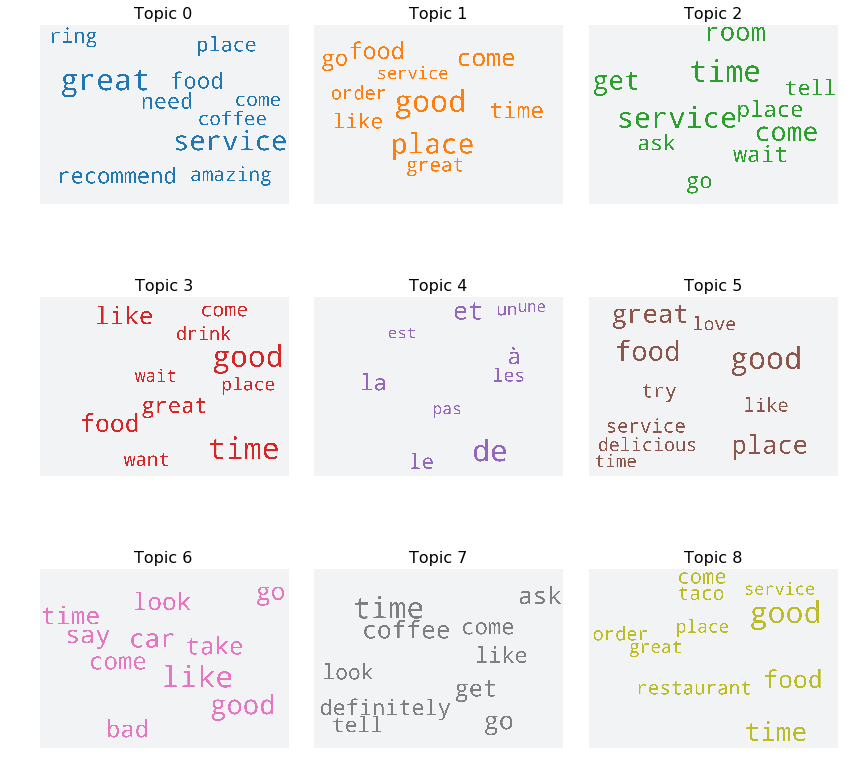

In [115]:
#Wordcloud sample visualization of the first 9 topics:

from matplotlib import pyplot as plt
from wordcloud import WordCloud
import matplotlib.colors as mcolors
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='#F2F3F4',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda.show_topics(formatted=False)

fig, axes = plt.subplots(3, 3, figsize=(12,12), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

## Topic Analysis:

At a glance, the word clouds look more visually appealing than the pyldavis interactive visualization. However, the pyldavis visualizations provide more insight into the topics. While there is substantial overlap in many of the hi-frequency words used in the reviews, differences between some of the topics are clear.

Topic 1 appears to apply to generally favorable reviews (good, great, amazing, friendly, delicious) for a typical american style restaurant (burgers, chicken, fresh, fry). Topic 3 probably contains reviews for pizza restaurants. For topic 12, ice cream/dessert seems to be the theme. 
Topic 23 looks like it contains a lot of Ramen / noodle restaurants, and topic 22 seems to relate to sushi/ roll restaurants. While the majority of yelp reviews pertain to restaurants, other business do have profiles and reviews. For example, Topic 13 applies to salons/places to get a haircut.
These are just a few insights gained from interacting with pyldavis- a cool prject idea would be to group the yelp reviews by star rating and then perform topic modelling to analyze key words that appera/dont appear in diff tier ratings of the reviews.


## Stretch Goals

Complete one of more of these to push your score towards a three: 
* Incorporate named entity recognition into your analysis
* Compare vectorization methods in the classification section
* Analyze more (or all) of the yelp dataset - this one is v. hard. 
* Use a generator object on the reviews file - this would help you with the analyzing the whole dataset.
* Incorporate any of the other yelp dataset entities in your analysis (business, users, etc.)